# TK Title

## Group Contribution Statement

## Data Import and Cleaning

In [9]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

In [10]:
# loads data
penguins = pd.read_csv("palmer_penguins.csv")

# selects for columns we are interested in
cols = ['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']
penguins = penguins[cols]

In [11]:
# helper functions

def clean_data(penguins_data):
    penguins_data = penguins_data.copy()
    # removes rows with missing data
    penguins_data = penguins_data.dropna()
    # removes row with where "Sex" = "."
    penguins_data = penguins_data.drop(penguins_data[penguins_data['Sex'] == '.'].index)
    # shortens Species name
    penguins_data["Species"] = penguins_data["Species"].str.split().str.get(0)

    return penguins_data

def encode_string_data(penguins_data, string_cols):
    penguins_data = penguins_data.copy()
    le = preprocessing.LabelEncoder()

    for col in string_cols:
        penguins_data[col] = le.fit_transform(penguins_data[col])

    return penguins_data

def prep_ml_data(penguins_data):
    penguins_data = penguins_data.copy()
    penguins_data = clean_data(penguins_data)
    penguins_data = encode_string_data(penguins_data, ["Island", "Sex", "Species"])

    X = penguins_data.drop(["Species"], axis = 1)
    y = penguins_data["Species"]

    return X, y

In [12]:
# prepares data for ml models

np.random.seed(42)
train, test = train_test_split(penguins, train_size=0.8, test_size=0.20)

X_train, y_train = prep_ml_data(train)
X_test, y_test = prep_ml_data(test)

## Exploratory Analysis

### Figure #3:

In [13]:
# clean data for exploratory analysis
penguins = clean_data(penguins)

[Text(0.5, 1.0, 'Torgerson'),
 Text(0.5, 28.999999999999993, 'Mean Culmen Length (mm)')]

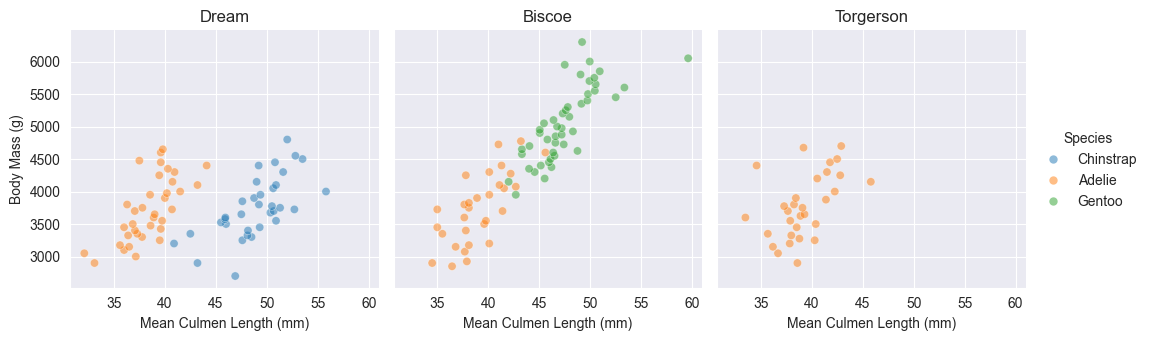

In [14]:
grouped = penguins.groupby(["Body Mass (g)", "Species", "Island"])[["Culmen Length (mm)"]].mean().reset_index()

fig = sns.relplot(data=grouped,
                  y="Body Mass (g)",
                  x="Culmen Length (mm)",
                  hue="Species",
                  col="Island",
                  height=3.5,
                  alpha=0.5)

fig.axes[0][0].set(title="Dream",
                   ylabel="Body Mass (g)",
                   xlabel="Mean Culmen Length (mm)")
fig.axes[0][1].set(title="Biscoe",
                   xlabel="Mean Culmen Length (mm)")
fig.axes[0][2].set(title="Torgerson",
                   xlabel="Mean Culmen Length (mm)")

indicates that body mass, culmen length, and island might be good features

## Feature Selection

In [15]:
# automated feature selection, abstracted for different models

def select_features(model, data):
    def test_columns(cols):
        model.fit(X_train[cols], y_train)
        return model.score(X_test[cols], y_test)

    # gets all combinations of 3 features
    col_combos = [list(cols) for cols in list(combinations(data.columns.tolist(), 3))]

    highest_score = -1
    best_cols = []
    for cols in col_combos:
        new_score = test_columns(cols)
        if new_score > highest_score:
            best_cols = cols
            highest_score = new_score

    return best_cols

RF = RandomForestClassifier()
RF_features = select_features(RF, X_train)

## Modeling

### Model #3: Random Forest Classifier

## Discussion